# Projet de *Networks for information retrieval*

## Décompresser l'archive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!unzip /content/drive/MyDrive/data_MIASHS.zip -d /content

Archive:  /content/drive/MyDrive/data_MIASHS.zip
   creating: /content/20240125_dataset_pickle/
  inflating: /content/__MACOSX/._20240125_dataset_pickle  
  inflating: /content/20240125_dataset_pickle/20240125_dataset_rscir_xxs.pickle  
  inflating: /content/__MACOSX/20240125_dataset_pickle/._20240125_dataset_rscir_xxs.pickle  
  inflating: /content/20240125_dataset_pickle/20240125_dataset_emixx_grif.pickle  
  inflating: /content/__MACOSX/20240125_dataset_pickle/._20240125_dataset_emixx_grif.pickle  
  inflating: /content/20240125_dataset_pickle/20240124_dataset_1895_assr.pickle  
  inflating: /content/__MACOSX/20240125_dataset_pickle/._20240124_dataset_1895_assr.pickle  
  inflating: /content/20240125_dataset_pickle/20240125_dataset_ofce_receo.pickle  
  inflating: /content/__MACOSX/20240125_dataset_pickle/._20240125_dataset_ofce_receo.pickle  
  inflating: /content/20240125_dataset_pickle/20240125_dataset_hedu_karst.pickle  
  inflating: /content/__MACOSX/20240125_dataset_pickle/._2

## Charger les données

In [11]:
import pandas as pd
import pickle
import os

# liste vide pour stocker les dataframes
df_list = []
directory = "/content/20240125_dataset_pickle"

# itérer sur tous les fichiers du repéertoire 'directory'

for filename in os.listdir(directory):
    # vérifier si c'est n fichier pickle
    if filename.endswith('.pickle'):
        # chemin complet vers les fichiers
        filepath = os.path.join(directory, filename)
        # convertir le fichier pickle en dataframe
        df = pd.read_pickle(filepath)
        # ajouter le dataframe dans la liste de datraframes
        df = df[["dcterms:identifier{Literal}","dcterms:title{Literal}","dcterms:abstract{Literal}@fr","marcrel:aut{URIRef}[0]","marcrel:aut{URIRef}[1]",
          "marcrel:aut{URIRef}[2]","marcrel:aut{URIRef}[3]","cito:isCitedBy{URIRef}[0]","cito:isCitedBy{URIRef}[1]","cito:isCitedBy{URIRef}[2]",
          "cito:isCitedBy{URIRef}[3]"]]
        df_list.append(df)

data = pd.concat(df_list, ignore_index=True)

In [13]:
data = data.rename(columns={
    "dcterms:identifier{Literal}": "lien",
    "dcterms:title{Literal}": "titre",
    "dcterms:abstract{Literal}@fr": "abstract_fr",
    "marcrel:aut{URIRef}[0]": "auteur_0",
    "marcrel:aut{URIRef}[1]": "auteur_1",
    "marcrel:aut{URIRef}[2]": "auteur_2",
    "marcrel:aut{URIRef}[3]": "auteur_3",
    "cito:isCitedBy{URIRef}[0]": "citedby_0",
    "cito:isCitedBy{URIRef}[1]": "citedby_1",
    "cito:isCitedBy{URIRef}[2]": "citedby_2",
    "cito:isCitedBy{URIRef}[3]": "citedby_3",
})


In [5]:
data.head()

,lien,titre,abstract_fr,auteur_0,auteur_1,auteur_2,auteur_3,auteur_4,auteur_5,auteur_6,...,citedby_0,citedby_1,citedby_2,citedby_3,citedby_4,citedby_5,citedby_6,citedby_7,citedby_8,citedby_9
0,https://www.persee.fr/doc/recod_1245-4060_1993...,Présentation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,https://www.persee.fr/doc/recod_1245-4060_1993...,La politique économique face aux chocs externe...,NaN,http://data.persee.fr/authority/46555#Person,http://data.persee.fr/authority/46640#Person,http://data.persee.fr/authority/655987#Person,NaN,NaN,NaN,NaN,...,http://data.persee.fr/doc/polit_0032-342x_1997...,http://data.persee.fr/doc/polit_0032-342x_1998...,http://data.persee.fr/doc/tiers_1293-8882_2000...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,https://www.persee.fr/doc/recod_1245-4060_1993...,Invalidité temporaire et production agricole :...,Les pertes économiques de la dracunculose (ou...,http://data.persee.fr/authority/200631#Person,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,https://www.persee.fr/doc/recod_1245-4060_1993...,Les effets économiques de l'épidémie du SIDA e...,"Depuis son apparition au début des années 80,...",http://data.persee.fr/authority/162520#Person,http://data.persee.fr/authority/656696#Person,http://data.persee.fr/authority/656697#Person,NaN,NaN,NaN,NaN,...,http://data.persee.fr/doc/recod_1245-4060_2000...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,https://www.persee.fr/doc/recod_1245-4060_1993...,Fraude et réforme de la fiscalité dans une éco...,La faiblesse du système administratif de Mada...,http://data.persee.fr/authority/29056#Person,http://data.persee.fr/authority/656699#Person,http://data.persee.fr/authority/656701#Person,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
len(data)

908780

Prétraitements nécessaires pour isoler les informations qui nous intéressent dans les liens

In [14]:
# extraire l'ID dans le lien
data['id'] = data['lien'].str.extract(r'https://www.persee.fr/doc/([a-z]+)_')
# data['id'] = data['id'].str.split('/').str.get(-1)

import re

def extract_id(url):
    # motif regex pour trouver l'identifiant
    pattern = r'http://data\.persee\.fr/authority/(\d+)#Person'

    # Rechercher le motif dans l'URL
    match = re.search(pattern, url)

    # Vérifier si un match est trouvé
    if match:
        # Extraire et retourner l'identifiant
        return match.group(1)
    else:
        # Retourner None si aucun match n'est trouvé
        return url


# Appliquez la fonction extract_id à toutes les colonnes du dataframe
for col in data.columns:
    data[col] = data[col].apply(lambda x: extract_id(x) if isinstance(x, str) else x)


In [ ]:
data.sample(frac=1).reset_index(drop=True).head()

,id,titre,abstract_fr,auteur_0,auteur_1,auteur_2,auteur_3,auteur_4,auteur_5,auteur_6,...,citedby_0,citedby_1,citedby_2,citedby_3,citedby_4,citedby_5,citedby_6,citedby_7,citedby_8,citedby_9
0,bec,Théodore PAPADOPOULLOS. Social and historical ...,NaN,622508,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,geo,Périodiques reçus,NaN,1615,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,gradh,"Jeu, incorporation et métaphore dans les théât...",NaN,28013,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,antiq,NaN,NaN,247041,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,phlou,"H.J. de Vleeschauwer, Plans d'études au XVIIe ...",NaN,248749,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Comme on peut le constater, seuls 11% des articles ont un abstract. Etant donné la très grande taille de la base de données, cela nous permettra de réduire les temps de calculs lorsqu'on va effecteur des analyses sur du texte.

In [ ]:
missing_proportion = data['id'].isnull().mean()
print("% NaN in 'ID': {:.2%}".format(missing_proportion))

% NaN in 'ID': 8.12%


In [ ]:
missing_proportion = data['titre'].isnull().mean()
print("% NaN in 'titre': {:.2%}".format(missing_proportion))

% NaN in 'titre': 3.74%


In [ ]:
missing_proportion = data['abstract_fr'].isnull().mean()
print("% NaN in 'asbtract': {:.2%}".format(missing_proportion))

% NaN in 'asbtract': 88.89%


In [ ]:
missing_proportion = data['auteur_0'].isnull().mean()
print("% NaN in 'auteur_0': {:.2%}".format(missing_proportion))

% NaN in 'auteur_0': 20.44%


## Nettoyage du texte

Avant de commencer les analyses textuelles et les tâches de classifications, nous devons nettoyer le texte afin de supprimer les unités textuelles vides de sens (stopwords) mais aussi les caractères spéciaux comme la ponctuation qui risqueraient d'agrandir la taille du vocabulaire et d'allourdir l'allocation mémoire.

In [6]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
nltk.download('wordnet')

stop = set(stopwords.words('french'))

def preprocess_text(text):

    # Vérifier le type de données
    if not isinstance(text, str):
        return text

    # Lowercase
    text = text.lower()

    # Remplacement des caractères spéciaux par des espaces
    special_characters = ['.', ';', ',', ':', ';', '!', '?', '(', ')', '/', '"', '[', ']', '{', '}', '’', '\'']
    for char in special_characters:
        text = text.replace(char, ' ')

    # Suppression des mots d'une seule lettre
    words = text.split()
    text = ' '.join([word for word in words if len(word) > 1 and word not in stop])

    return text

# Appliquer la fonction preprocess_text aux colonnes 'abstract_fr' et 'titre'
data['abstract_fr'] = data['abstract_fr'].apply(preprocess_text)
data['titre'] = data['titre'].apply(preprocess_text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
data['abstract_fr'].dropna().sample(frac=1).reset_index(drop=True).head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0    395 394 agésilas rencontre pharnabaze satrape ...
1    -n trusson bien connu histoire profession né 1...
2    fin xiiie fin xive siècle quercynois français ...
3    plupart études portant sites touristiques limi...
4    fouille rue laitière permis mise jour chauffer...
Name: abstract_fr, dtype: object

In [ ]:
data['titre'].dropna().sample(frac=1).reset_index(drop=True).head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0    industrie bancaire vertu sociale crédit puissa...
1        nomination deux chefs clinique hôpitaux paris
2                 mécanismes base métier chaîne valeur
3    antoine charles catholiques brésiliens sous ré...
4    classement conservation archives académie inst...
Name: titre, dtype: object

## Topic modeling avec LDA

In [ ]:
import gensim
from gensim import corpora
from gensim.models.ldamodel import LdaModel
import pyLDAvis.gensim_models

doc_lda = [doc.split() for doc in data['abstract_fr'].dropna()]

# 2. Création du dictionnaire et du corpus
dictionary = corpora.Dictionary(doc_lda)
corpus = [dictionary.doc2bow(doc) for doc in doc_lda]

# 3. Application de LDA
ldamodel = LdaModel(corpus, num_topics=25, id2word = dictionary, passes=15)

ldamodel.save("lda_model")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Visualiation avec pyLDAVis

In [ ]:
import gensim
from gensim import corpora
from gensim.models.ldamodel import LdaModel
import pyLDAvis.gensim_models

# 4. Visualisation avec pyLDAvis
lda_model = LdaModel.load('lda_model')
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary, n_jobs=1)
pyLDAvis.display(vis)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Créer une nouvelle colonne qui encode la discipline à laquelle appartiennent les documents

In [17]:
# Charger le fichier disciplines.csv
disciplines = pd.read_csv('/content/20240125_dataset_pickle/20240141_disciplines.csv', sep=';', encoding='utf-8')

# Faire une jointure pour ajouter la colonne 'discipline'
data = data.merge(disciplines, left_on='id', right_on='collection_id', how='left')

# supprimer les colonnes inutiles
data.drop(columns=['collection_id'], inplace=True)

# Encoder numériquement les modalités de la variable 'discipline'
data['id_discipline'], unique = pd.factorize(data['Discipline'])
data['id_discipline'] = data['id_discipline'].replace(-1, 26)

data[['id','titre','abstract_fr','Discipline', 'id_discipline']].head()

,id,titre,abstract_fr,Discipline,id_discipline
0,recod,Présentation,,Economie,0
1,recod,La politique économique face aux chocs externe...,,Economie,0
2,recod,Invalidité temporaire et production agricole :...,Les pertes économiques de la dracunculose (ou...,Economie,0
3,recod,Les effets économiques de l'épidémie du SIDA e...,"Depuis son apparition au début des années 80,...",Economie,0
4,recod,Fraude et réforme de la fiscalité dans une éco...,La faiblesse du système administratif de Mada...,Economie,0


L'histoire et la sociologie sont de loin les disciplines les plus présentes dans ce corpus

In [6]:
data['Discipline'].value_counts()

Histoire                137350
Sociologie               88798
Religion theologie       67184
Etudes classiques        59096
Litterature              56518
Pluri. Par essence       47699
Etudes g. a. cultur.     44860
Science politique        38337
Linguistique             37166
Science environmnt       35376
Sciences vie             29539
Science education        23725
Archeologie (M.Anc.)     23148
Hist. sc. techniques     20041
Droit                    18865
Geographie…              17646
Philosophie              17513
Sciences Terre           12598
Demographie              12481
Economie                 11744
Sc. info. comm.          11679
Psychologie               9849
Anthropologie             8231
Arts (h. art archi.)      2628
Etudes regionales         1157
Patrimoine,musées          576
Name: Discipline, dtype: int64

## Générer un nuage de mots-clés

In [10]:
!pip install wordcloud

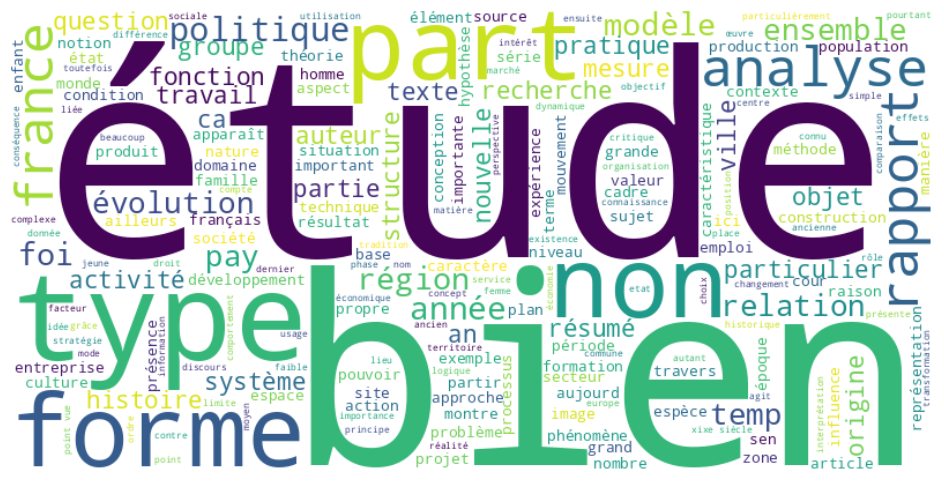

In [7]:
from spacy.lang.fr.stop_words import STOP_WORDS as fr_stop
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combiner tous les textes de la colonne 'abstract_fr' dans une seule chaîne
text = " ".join(review for review in data['abstract_fr'].dropna())

# Créer l'objet WordCloud
wordcloud = WordCloud(background_color="white", min_font_size=8, width=800, height=400, max_words=250, stopwords=list(fr_stop)).generate(text)

# Afficher l'image générée par le WordCloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")  # Enlever les axes pour une meilleure visibilité
plt.show()

wordcloud.to_file("wordcloud_image.png")

## Classification supervisée avec FastText

In [10]:
!pip install fasttext

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.8/68.8 kB 3.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached pybind11-2.11.1-py3-none-any.whl (227 kB)
  Created wheel for fasttext: filename=fasttext-0.9.2-cp310-cp310-linux_x86_64.whl size=4199771 sha256=ae4e1da64e888a4c7db96e12375ab30c04cc9ec1b04a0001ee93cd40d34096d1
  Stored in directory: /root/.cache/pip/wheels/a5/13/75/f811c84a8ab36eedbaef977a6a58a98990e8e0f1967f98f394
Successfully built fasttext


In [ ]:
# Remplacer les valeurs 'NaN' par des chaînes vides
data['titre'] = data['titre'].fillna('')
data['abstract_fr'] = data['abstract_fr'].fillna('')

# Créer une nouvelle colonne 'text' en concaténant 'titre' et 'abstract_fr'
data['text'] = data['titre'] + ' ' + data['abstract_fr']

In [18]:
from sklearn.model_selection import train_test_split
import datetime

train_file = "train.txt"
test_file = "test.txt"
valid_file = "valid.txt"

# enlever les textes vides
data = data[data['text'].apply(lambda x: x.strip() != '')]

# ajouter '__label__' car fasttext en a besoin pour repérer les labels dans le text
data['id_discipline'] = data['id_discipline'].apply(lambda x: '__label__' + str(x))

# générer 3 dataframes : 1 pour l'entraînement, 1 pour la validation et l'optimisation des hyperparamètres, et 1 pour évaluer le modèle
df_train, df_test_valid = train_test_split(data[['text', 'id_discipline']], test_size=0.2, random_state=int(datetime.datetime.now().strftime("%H%M%S")), stratify=data["id_discipline"])
df_test, df_valid = train_test_split(df_test_valid, test_size=0.5, random_state=int(datetime.datetime.now().strftime("%H%M%S")), stratify=df_test_valid["id_discipline"])

# df transformés en fichiers txt car FastText ne prend en charge que ce genre de fichier
df_train.to_csv(train_file, index=False, header=False, sep=' ')
df_test.to_csv(test_file, index=False, header=False, sep=' ')
df_valid.to_csv(valid_file, index=False, header=False, sep=' ')

In [19]:
import fasttext

# trouver les meilleurs hyperparamètres
model = fasttext.train_supervised(input='train.txt', autotuneValidationFile='valid.txt', autotuneDuration=500, epoch=3, minn=0, maxn=0)
model.save_model("model.bin")

In [20]:
# afficher la précision du modèle
model.test(test_file)

(87589, 0.6025185811003665, 0.6025185811003665)

In [ ]:
# créer une table de passage pour retrouver le nom des disciplines à partir des 'id'
disciplines = data[['id_discipline', 'Discipline']].drop_duplicates()

disciplines = disciplines.sort_values(by='id_discipline')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Le code ci-dessous vous propose de tenter de prédire la collection d'un abstract à partir du modèle FastText entraîné juste avant

In [ ]:
import pandas as pd
import fasttext

# Chargement du modèle FastText
model = fasttext.load_model('model.bin')

# Demander à l'utilisateur d'entrer du texte
prompt = input("Veuillez écrire du texte pour la prédiction : ")

# Faire la prédiction
predicted_label, proba = model.predict(prompt, k=1)

# Extraction du label (en enlevant le préfixe '__label__')
predicted_label = predicted_label[0].replace('__label__', '')

# Faire un merge pour trouver la description associée au label prédit
result = disciplines[disciplines['id_discipline'] == int(predicted_label)]

# Afficher la prédiction et la probabilité
print(f"Prédiction : {result['Discipline'].iloc[0]} avec une probabilité de {round(proba[0] * 100, 2)}%")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Veuillez écrire du texte pour la prédiction : premières avances christianisme empire après pères apologistes
Prédiction : Religion theologie avec une probabilité de 100.0%
